# THE SPARKS FOUNDATION GRIP TASK - 5

## AUTHOR: MALLIKA ADAK

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP, JULY - 2021

#### TASK -5: EXPLORATORY DATA ANALYSIS - SPORTS

OBJECTIVE: To perform Exploratory Data Analysis(Advance Level) on dataset ‘Indian Premier League’ and find out the most successful teams, players and factors contributing win or loss of a team.

DATASET: https://bit.ly/34SRn3b

### 1) Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 2) Reading the Data from the Source

In [2]:
matches = pd.read_csv('D:\MALLIKA\matches.csv')
print('Data set imported successfully')

matches.head()

Data set imported successfully


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv('D:\MALLIKA\deliveries.csv')
print('Data set imported successfully')

deliveries.head()

Data set imported successfully


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### 3) Familiarizing with Data

#### 3.1 Analysing Matches Dataset

In [4]:
#Shape of dataframe
matches.shape

(756, 18)

In [5]:
# Determining the different columns in the dataset
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
#Information about the dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#unique value in dataset
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [8]:
# Describing the dataset by various parameters
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
matches.rename(columns={'win_by_runs':'Bat_1', 'win_by_wickets':'Ball_1'}, inplace=True)

#### 3.2 Analysing Deliveries Dataset

In [10]:
#Shape of dataframe
deliveries.shape

(179078, 21)

In [11]:
# Determining the different columns in the dataset
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [12]:
#Information about the dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [13]:
#unique value in dataset
deliveries.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [14]:
# Describing the dataset by various parameters
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### 4) Visualizing the data

#### 4.1 The Factors Affecting the Victory

In [15]:
# Evaluating correlation coefficient 
matches.corr()

,id,season,dl_applied,Bat_1,Ball_1
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
Bat_1,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
Ball_1,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


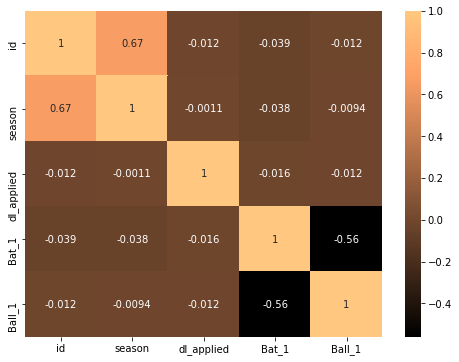

In [16]:
# plotting the heatmap of correlation matrix using seaborn
fig=plt.figure(figsize=(8,6))
sns.heatmap(matches.corr(), annot=True, cmap='copper');

#### 4.2 Exploratory Data Analysis on Indian Premier League

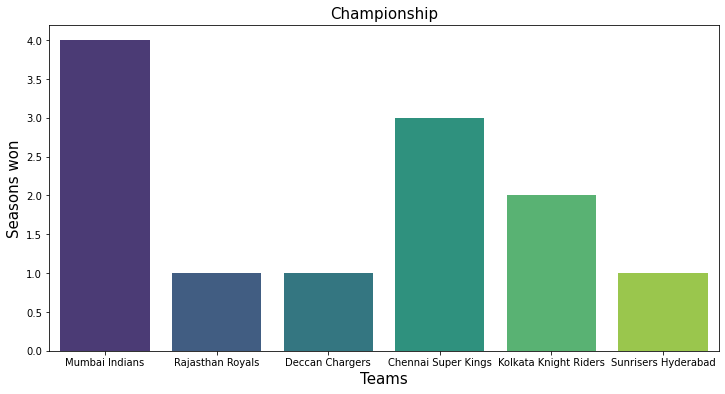

In [17]:
# Championships if IPL Teams
plt.subplots(figsize=(12,6))
seasonw = matches.drop_duplicates('season', keep='last')
sns.countplot('winner', data = seasonw, palette = 'viridis')
plt.title('Championship',fontsize=15)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Seasons won',fontsize=15)
plt.show()

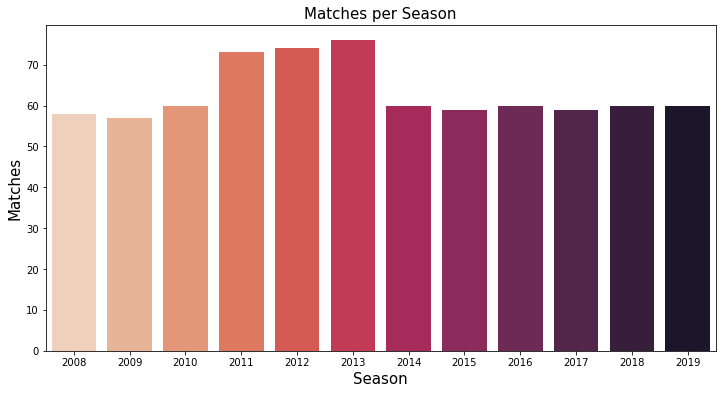

In [18]:
# Matches per season
plt.subplots(figsize=(12,6))
sns.countplot(x = 'season', data = matches, palette = 'rocket_r')
plt.title('Matches per Season',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

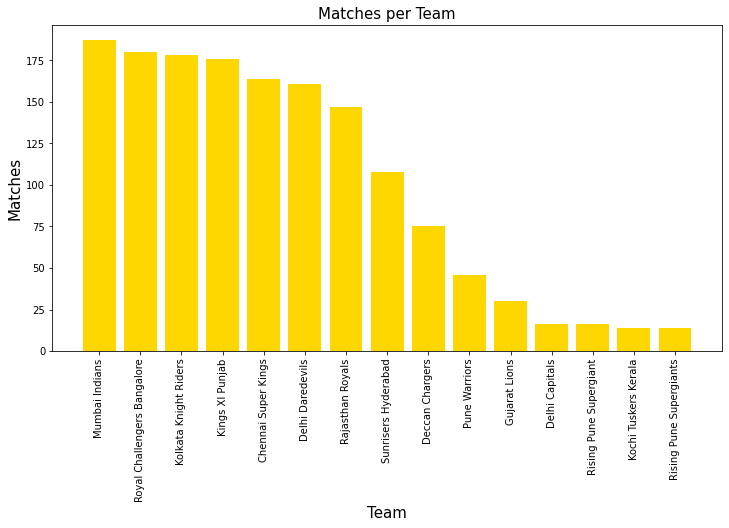

In [19]:
# Matches per team
num_matches = pd.concat([matches['team1'], matches['team2']])
num_matches = num_matches.value_counts()

plt.figure(figsize=(12,6))
plt.bar(x=num_matches.index, height=num_matches.values,color='gold')
plt.title('Matches per Team',fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.xticks(rotation=90)
plt.show()

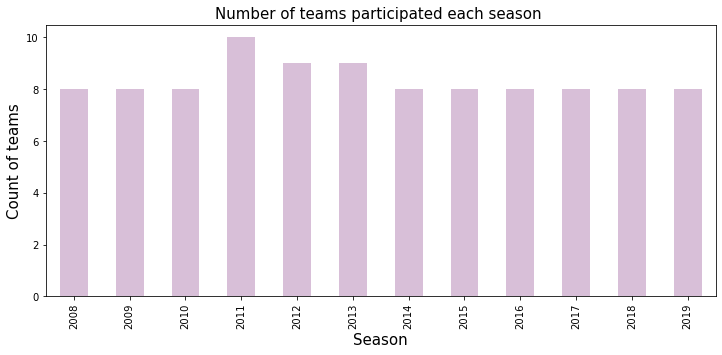

In [20]:
#Number of teams participated each season
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(12,5),color='thistle')
plt.title("Number of teams participated each season ",fontsize=15)
plt.ylabel("Count of teams",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.show()

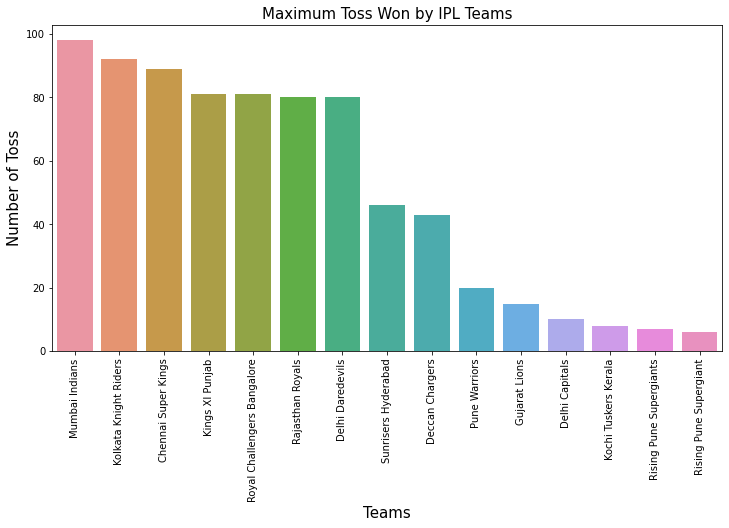

In [21]:
#Maximum Toss Won
plt.figure(figsize=(12,6))
sns.barplot( matches['toss_winner'].value_counts().index,matches['toss_winner'].value_counts().values)
plt.title('Maximum Toss Won by IPL Teams',fontsize=15)
plt.xlabel('Teams',fontsize=15)
plt.xticks(rotation=90,)
plt.ylabel('Number of Toss',fontsize=15)
plt.show()

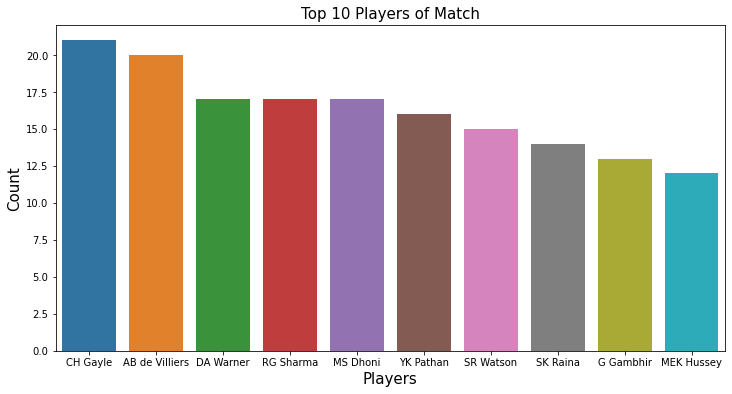

In [22]:
#Top 10 Players of Match
plt.subplots(figsize=(12,6))
sns.barplot(matches['player_of_match'].value_counts()[:10].index, matches['player_of_match'].value_counts()[:10].values)
plt.title('Top 10 Players of Match',fontsize=15)
plt.xlabel('Players',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

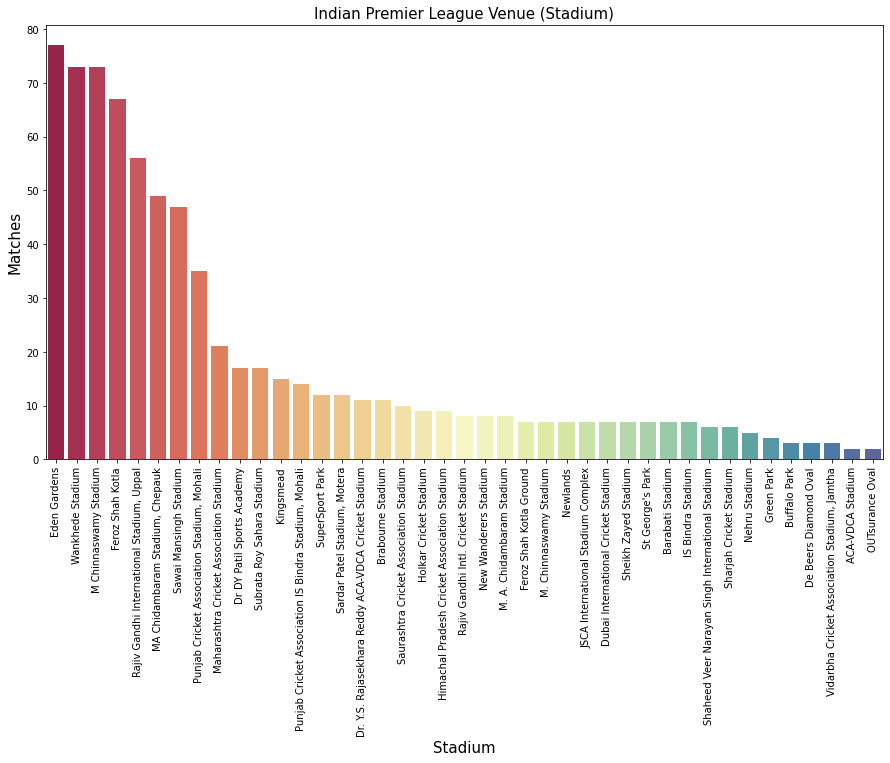

In [23]:
# Visualization of how many matches were played in which stadium
plt.subplots(figsize=(15,8))
sns.countplot(x ='venue',data=matches,palette='Spectral',order=matches['venue'].value_counts().index)
plt.title('Indian Premier League Venue (Stadium)',fontsize=15)
plt.xlabel('Stadium',fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Most matches have been played in Eden Gardens followed by Wankhede Stadium.

In [24]:
print("City in which most matches have been won        :",matches['city'].value_counts().idxmax()) 
print("Team that has won most matches                  :",matches['winner'].value_counts().idxmax()) 
print("Player who has been man of the match most times :",matches['player_of_match'].value_counts().idxmax()) 
print("Most frequent Umpire 1                          :" ,matches['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2                          :" ,matches['umpire2'].value_counts().idxmax())

City in which most matches have been won        : Mumbai
Team that has won most matches                  : Mumbai Indians
Player who has been man of the match most times : CH Gayle
Most frequent Umpire 1                          : HDPK Dharmasena
Most frequent Umpire 2                          : C Shamshuddin


#### 4.3 Merging the two Datasets into a new Dataset

In [25]:
merge=pd.merge(deliveries, matches, left_on='match_id', right_on='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [26]:
print('Shape:', merge.shape)
print('Size:', merge.size)

Shape: (179078, 39)
Size: 6984042


In [27]:
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,Bat_1,Ball_1
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [28]:
merge.duplicated().sum()

23

In [29]:
merge.drop_duplicates()
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [30]:
#Correlation Coefficient
merge.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,Bat_1,Ball_1
match_id,1.000000,0.003958,0.008268,-0.001349,-0.009150,-0.007549,0.000905,-0.012429,-0.004623,-0.001475,0.033510,-0.013323,0.030727,1.000000,0.670956,-0.008172,-0.039757,-0.005500
inning,0.003958,1.000000,-0.050076,-0.003943,0.084154,0.001201,-0.000757,-0.001996,-0.000904,0.003442,-0.005362,-0.000531,-0.005485,0.003958,0.000936,-0.032561,-0.000492,-0.024391
over,0.008268,-0.050076,1.000000,-0.007424,-0.034329,-0.010003,0.012111,-0.004764,0.016984,-0.000979,0.086701,-0.002479,0.086326,0.008268,0.007505,-0.045694,0.004198,-0.038424
ball,-0.001349,-0.003943,-0.007424,1.000000,-0.001143,-0.004665,0.006602,-0.002727,0.000567,0.000711,0.007950,-0.002576,0.007414,-0.001349,-0.003168,0.001729,0.001216,-0.002015
is_super_over,-0.009150,0.084154,-0.034329,-0.001143,1.000000,-0.001019,0.001353,0.001735,0.013640,-0.000071,0.010125,0.003504,0.010891,-0.009150,-0.001640,-0.002873,-0.012258,-0.020729
wide_runs,-0.007549,0.001201,-0.010003,-0.004665,-0.001019,1.000000,-0.006196,-0.015855,-0.008675,0.012817,-0.094579,0.720916,0.059077,-0.007549,-0.010556,0.003721,-0.000093,0.005831
bye_runs,0.000905,-0.000757,0.012111,0.006602,0.001353,-0.006196,1.000000,-0.004596,-0.002515,-0.000142,-0.018936,0.332352,0.051946,0.000905,-0.004104,-0.000664,0.002362,-0.004959
legbye_runs,-0.012429,-0.001996,-0.004764,-0.002727,0.001735,-0.015855,-0.004596,1.000000,-0.006434,-0.000362,-0.070106,0.554458,0.048075,-0.012429,-0.013146,-0.000390,0.003124,-0.005205
noball_runs,-0.004623,-0.000904,0.016984,0.000567,0.013640,-0.008675,-0.002515,-0.006434,1.000000,-0.000198,0.004832,0.194899,0.046427,-0.004623,-0.011443,-0.001444,0.003536,-0.001300
penalty_runs,-0.001475,0.003442,-0.000979,0.000711,-0.000071,0.012817,-0.000142,-0.000362,-0.000198,1.000000,-0.002591,0.057882,0.009755,-0.001475,-0.002429,-0.000451,-0.001926,0.004232


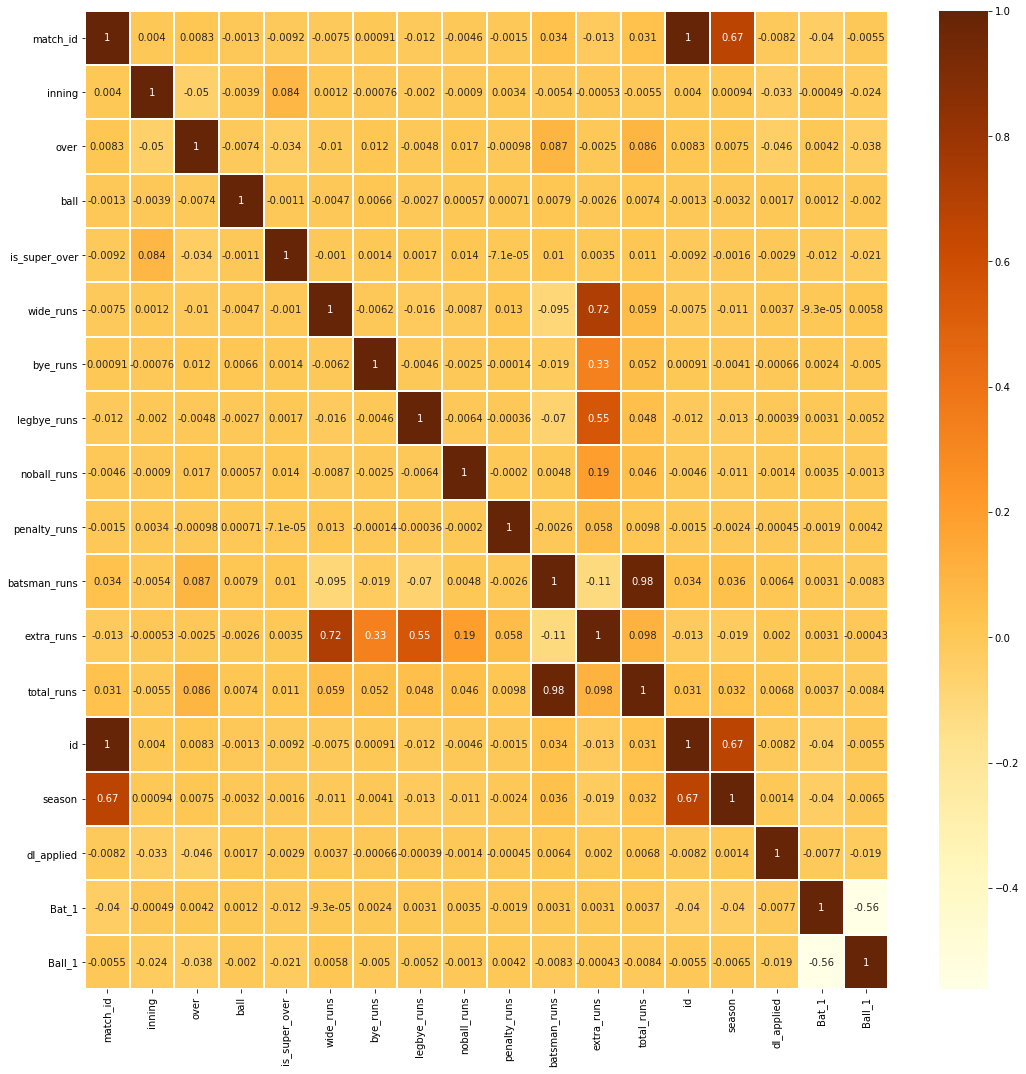

In [31]:
#Correlation Heatmap
plt.figure(figsize=(18,18))
sns.heatmap(merge.corr(), annot=True, linewidth=1, cmap='YlOrBr');

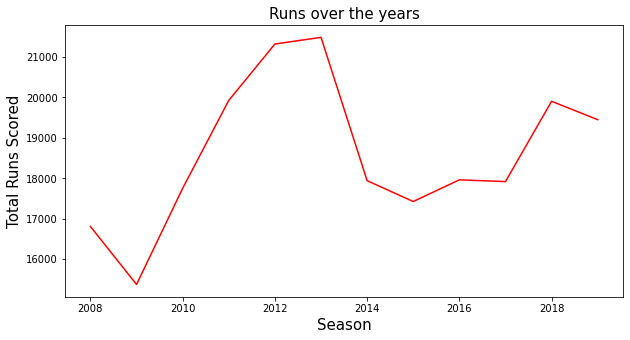

In [32]:
#Runs Over the Years
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', figsize =(10,5),color = 'red')
                                                
plt.title("Runs over the years",fontsize= 15)
plt.xlabel("Season", fontsize = 15)
plt.ylabel("Total Runs Scored", fontsize = 15)
plt.show()

In [33]:
team_stats = pd.DataFrame({'Total Matches played': matches.team1.value_counts() + matches.team2.value_counts(), 'Total won': matches.winner.value_counts(), 'Toss won': matches.toss_winner.value_counts(), 
                          'Total lost': ((matches.team1.value_counts() + matches.team2.value_counts()) - matches.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Total won'] / team_stats['Total Matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total Matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,109,98,78,0.58
9,Pune Warriors,46,12,20,34,0.26


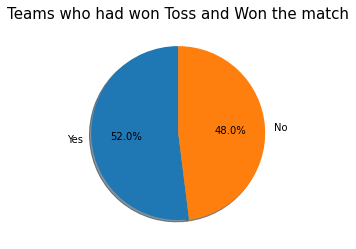

In [34]:
Tosswin_matchwin=matches[matches['toss_winner']==matches['winner']]
slices=[len(Tosswin_matchwin),(len(matches)-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
plt.title("Teams who had won Toss and Won the match",fontsize=15)
plt.show()

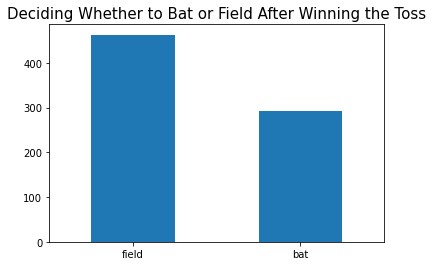

In [35]:
delivery=matches
delivery.venue.value_counts()
delivery.toss_decision.value_counts().plot(kind='bar')
plt.title("Deciding Whether to Bat or Field After Winning the Toss",fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [36]:
print('Team that won most matches by Batting First: ',matches.iloc[matches[matches['Bat_1'].ge(1)].Bat_1.idxmax()]['winner'])

Team that won most matches by Batting First:  Mumbai Indians


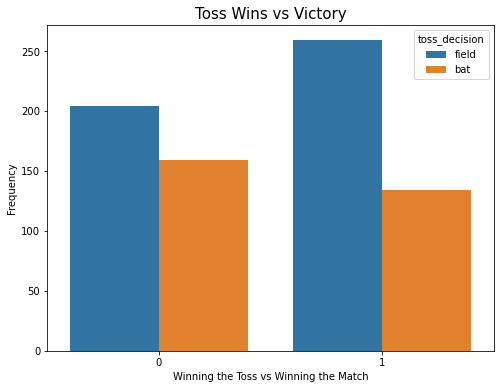

In [37]:
delivery
delivery['team_toss_win']=np.where((delivery.toss_winner==delivery.winner),1,0)
plt.figure(figsize=(8,6))
sns.countplot('team_toss_win', data=delivery, hue='toss_decision')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory",fontsize=15);

Teams who choose to field after winning the toss have high chances of winning.

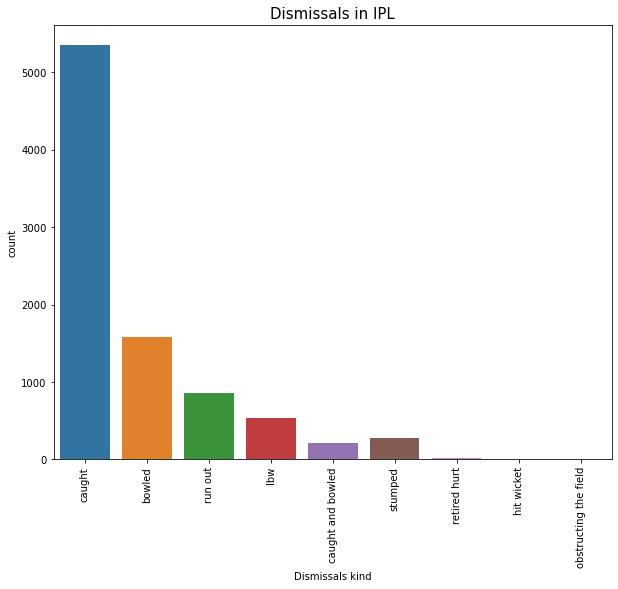

In [38]:
# Dismissals in IPL
plt.figure(figsize=(10,8))
ax=sns.countplot(deliveries.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=15)
plt.xlabel("Dismissals kind")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

#### 4.4 Batsmen overview

In [39]:
batsmen = deliveries.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen = batsmen.sort_values(['balls','runs'], ascending=False)
batsmen['batting_strike_rate'] = batsmen['runs']/batsmen['balls'] * 100
batsmen['batting_strike_rate'] = batsmen['batting_strike_rate'].round(2)
batsmen.head()

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84


In [40]:
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


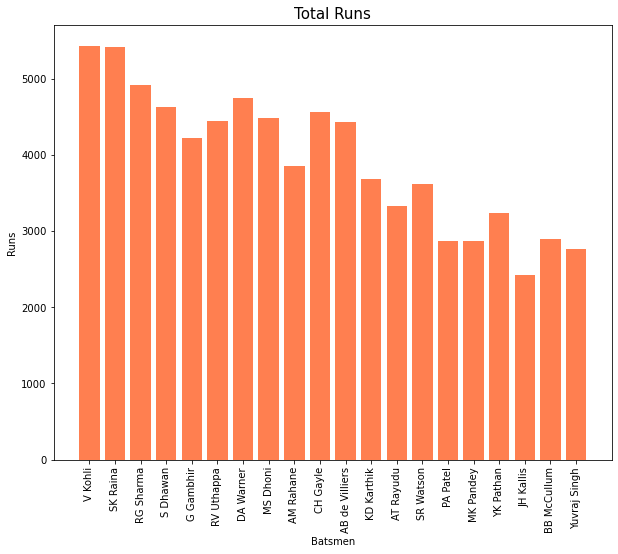

In [41]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['runs'],color='coral')
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title('Total Runs',fontsize=15)
plt.show()

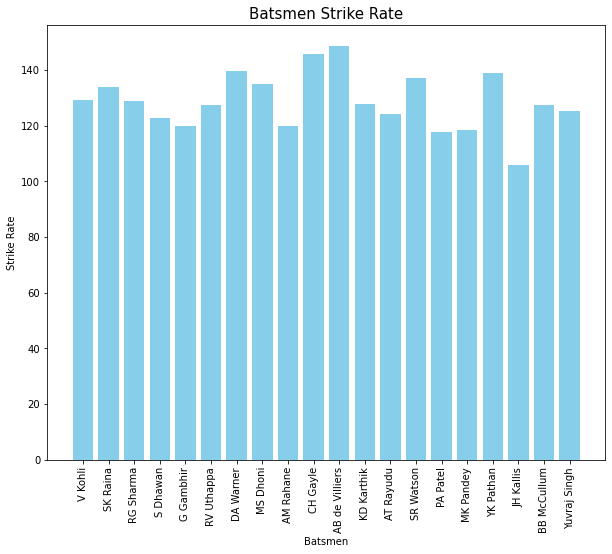

In [42]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['batting_strike_rate'],color='skyblue')
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate')
plt.title('Batsmen Strike Rate',fontsize=15)
plt.show()

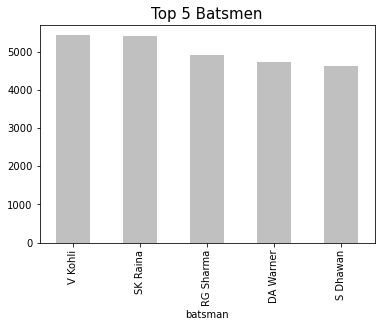

In [43]:
deliveries.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='silver')
plt.title("Top 5 Batsmen",fontsize=15);

1) Virat Kohli and S.K Raina Scored the most runs, so probability that in whichever team they were that team has the highest chances of winning by runs. <br>
2) Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat.

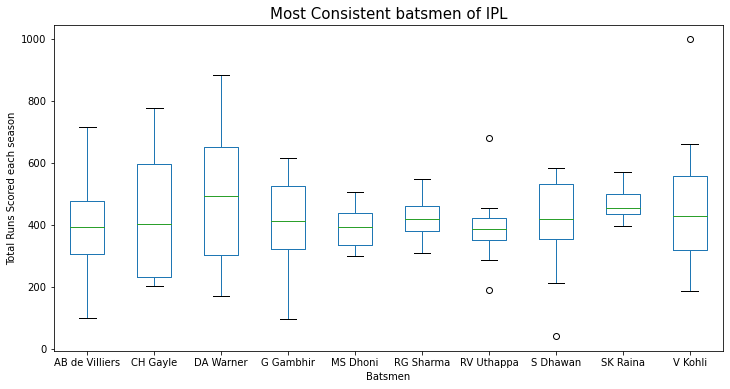

In [44]:
consistent_batsman = merge[merge.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (12,6))
plt.title("Most Consistent batsmen of IPL", fontsize = 15)
plt.xlabel("Batsmen")
plt.ylabel("Total Runs Scored each season")
plt.show()

#### 4.5 Bowlers Overview

In [45]:
bowler_wickets = deliveries.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlers = bowler_wickets.sort_values(['wickets'], ascending=False)[:20]
TopBowlers

,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136


In [46]:
TopBowlers['economy'] = TopBowlers['runs']/(TopBowlers['balls']/6)
TopBowlers = TopBowlers.sort_values(['economy'], ascending=True)[:20]
TopBowlers

,runs,balls,wickets,economy
bowler,,,,
UT Yadav,2605,3640,136,4.293956
R Vinay Kumar,2186,3043,127,4.310220
MM Sharma,1770,2457,99,4.322344
DJ Bravo,2711,3733,168,4.357353
PP Chawla,3157,4153,156,4.561040
YS Chahal,1841,2416,102,4.572020
RP Singh,1874,2417,100,4.652048
SR Watson,2137,2751,107,4.660851
A Nehra,1974,2537,121,4.668506


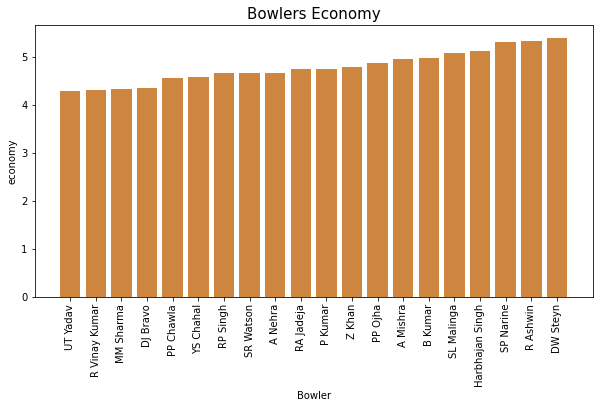

In [47]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['economy'],color='peru')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('economy')
plt.title('Bowlers Economy',fontsize=15)
plt.show()

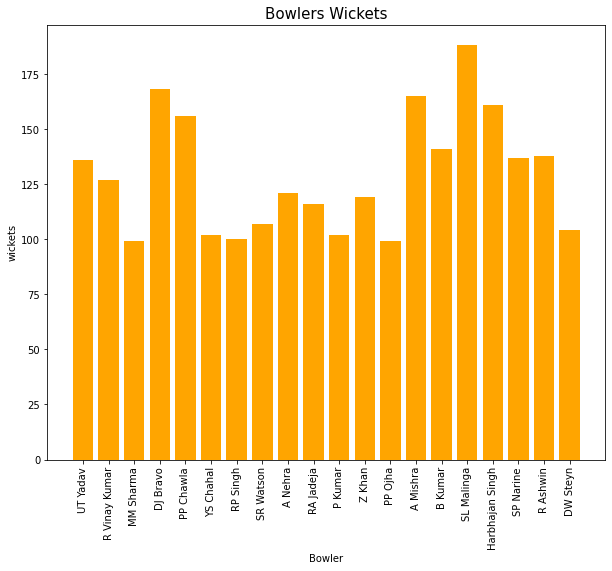

In [48]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['wickets'],color='orange')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('wickets')
plt.title('Bowlers Wickets',fontsize=15)
plt.show()

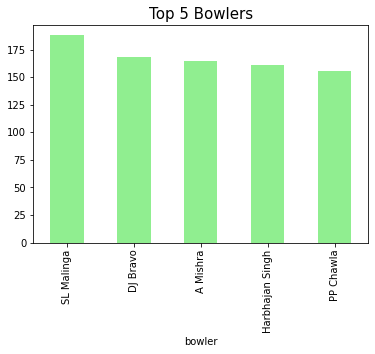

In [49]:
deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', color='lightgreen')
plt.title("Top 5 Bowlers",fontsize=15);

1) SL Malinga and DJ Bravo took the most wickets, so probability that in whichever team they were that team has the highest chances of winning by wickets. <br>
2) In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners. <br>
3) All 5 pacers are right arm pacers

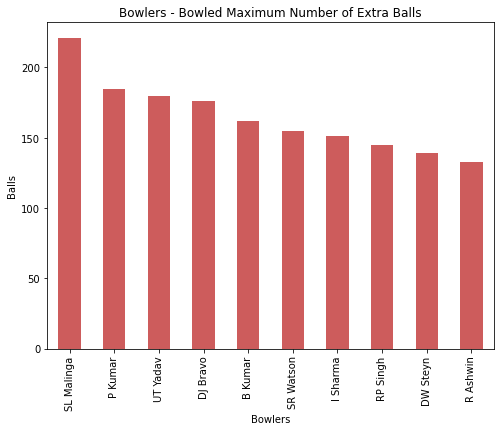

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [50]:
#Bowlers who have bowled maximum number of Extra balls
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(8,6), color='indianred')
plt.title('Bowlers - Bowled Maximum Number of Extra Balls')
plt.xlabel('Bowlers')
plt.ylabel('Balls')
plt.show()

extra = pd.DataFrame(extra)
extra.T

### 5) CONCLUSION

1) Mumbai Indians is the most successful team in IPL and has won the most number of toss. <br>
2) There were more matches won by chasing the total(419 matches) than defending(350 matches). <br>
3) When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi). <br>
4) When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances. <br>
5) The Mumbai city has hosted the most number of IPL matches. <br>
6) Chris Gayle has won the maximum number of player of the match title. <br>
7) S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field. <br>
8) Eden Gardens has hosted the maximum number of IPL matches. <br>
9) If a team wins a toss choose to field first as it has the highest probablity of winning. <br>